# [CP-113A] Analyzing the ACS 


---


### Professor: Sara Hinkley

Welcome to Analyzing the ACS! In this lab, we will introduce you to Jupyter Notebooks and the tools that you are going to use to conduct your data analysis of the American Community Survey (ACS). In the main part of this notebook, you will learn how to read tabular datasets, interpret data visualizations, and compare various economic indicators. By the end of this notebook, you will also apply your knowledge to answer a set of short answer questions.

Estimated Time: 1 Hour

---


## Table of Contents (TBD, will be updated later)

1. 

---

# Part 1: The Jupyter Notebook <a id='section 0'></a>

Before we start our lab, we want to give a brief introduction to Jupyter Notebooks (like this one) where you will work on conducting your survey analysis. 

**Jupyter notebooks** are documents that can contain a seamless compilation of text, code, visualizations, and more. A notebook is composed of two types of rectangular **cells**:  markdown and code. A **markdown cell**, such as this one, contains text. A **code cell** contains code. All of the code in this notebook is written in a programming language called **Python**. You can select any cell by clicking it once. After a cell is selected, you can navigate the notebook using the up and down arrow keys or by simply scrolling.

### 1.1 Run a cell <a id='subsection 0a'></a>
To run a code cell once it's been selected, 
- press `Shift` + `Enter`, or
- click the Run button in the toolbar at the top of the screen. 

If a code cell is running, you will see an asterisk (\*) appear in the square brackets to the left of the cell. Once the cell has finished running, a number corresponding to the order in which the cell was run will replace the asterisk and any output from the code will appear under the cell.

### 1.2 Editing a cell <a id='subsection 0c'></a>

**Question 1.2.1** You can edit a Markdown cell by clicking it twice. Text in Markdown cells is written in [**Markdown**](https://daringfireball.net/projects/markdown/), a formatting syntax for plain text, so you may see some funky symbols when you edit a text cell. Once you've made your changes, you can exit text editing mode by running the cell. 

**Task: Edit the next cell to fix the misspelling of the word, "survey."**

This is an analysis of economic survy data.

### 1.3 Saving and loading <a id='subsection 0d'></a>

#### Saving and Loading

Your notebook can record all of your text and code edits, as well as any graphs you generate or calculations you make. You can save the notebook in its current state by clicking `Control-S`/`Command-S`, clicking the **floppy disc icon** in the toolbar at the top of the page, or by navigating to **File > Save and Checkpoint** in the menu bar.

The next time you open the notebook, it will look the same as when you last saved it.

**Note:** After loading a notebook you will see all the outputs (graphs, computations, etc) from your last session, but you won't be able to use any variables you assigned or functions you defined. You can get the functions and variables back by re-running the cells where they were defined – the easiest way is to **highlight the cell where you left off work, then go to Cell > Run all above** in the menu bar. You can also use this menu to run all cells in the notebook by clicking **Run all**.

**Please run the cell below to load the modules we will be using throughout this notebook.**

In [2]:
from datascience import *
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from utils import dollar_formatter
sns.set_palette("Blues_d")

from IPython.display import HTML

# import the widgets module
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Part 2: Understanding the Dataset

In this lab, we will be analyzing data from the American Community Survey (ACS). This is a sample survey of U.S. households, which asks questions about demographics, income, employment, education, and public assistance. 

*First, run the cell below to get an idea of what our dataset looks like*

In [3]:
acs_data = Table().read_table('fulldata_v2.csv')
acs_data.show(2)

Year,State,County,City,Ownership Status,Household Income,Foodstamp Recipient,Age,Race,Hispanic,Education Status,Employment Status,Part of Labor Force,Occupation,Industry,Type of Worker,Employment Sector,Hours worked per week,Pre-Tax Wages,Poverty Status
2007,California,"El Centro, CA",Not in identifiable city (or size group),Rented,15000,No,32,White,Hispanic,No HS,Employed,"Yes, in the labor force","Farming, Fishing","Agriculture, Hunting, Forestry",Works for wages,non-profit,40,15000,Near Poverty
2007,California,Not in identifiable area,Not in identifiable city (or size group),Owned or being bought (loan),72000,No,52,White,Not hispanic,Graduate,Employed,"Yes, in the labor force",Healthcare Practitioners,Health Care,Works for wages,private,45,70000,Non-Poverty


What you see above is a table which contains a random sample of every survey response from the ACS survey. Each row of the table represents *an individual, unique response*. Along the top of the table are the columns: these represent *the questions that the survey asks* respondents about.

Our dataset consists of two surveys of Californian residents, combined for the years 2007 and 2017. Our goal is to compare trends over time. 

<div class="alert alert-success">
<b>  Scroll through the table and write down any observations or questions you have </b> 
</div>

##### Double click this cell and write your answer here.

At the very bottom, notice that it tells us that ~360,000 rows have been omitted. This is because our dataset is really large. In fact, it's so large that it would be very difficult to visualize it in a single notebook! [1] 

This is why we turn to *computational analysis*. 

Instead of inspecting the data by hand, *we will write code to tell our computer to analyze the data* for us. In this notebook, we use tools like data visualizations to answer interesting questions based on our survey data. 

Here's a concrete example of the power of computation:

Question: What percentage of all survey respondents are Foodstamp Recipients?

Obviously, for a dataset with few entries, this would be pretty easy to answer. However, for our dataset of 360,000+ respondents, this would be very difficult to count by hand. However, with code, this is easy to answer! 

<div class="alert alert-success">
<b>  Run the cell below to calculate the percent of Foodstamp Recipients in our dataset. </b> 
</div>

In [9]:
print(str(np.round(acs_data.where('Foodstamp Recipient', 'Yes').num_rows/acs_data.num_rows, 4)*100) + '%')

5.76%


In *one line of code*, we were able to get an idea of the demographics of a large population- this is the power of computational analysis!


Now, let's delve into the data analysis.

# Part 3: Data Analysis

## A) Wages by industry and occupation

In this part, we will investigate trends in wages between various industries and occupations. First, we will examine wages, industry, and occupation separately, and then compare them against each other and other survey variables. 

**Run the cell below to load the relevant data sets.**

In [5]:
industry_2007 = pd.read_csv('industry_2007.csv')
industry_2017 = pd.read_csv('industry_2017.csv')
occupation_2007 = pd.read_csv('occupation_2007.csv')
occupation_2017 = pd.read_csv('occupation_2017.csv')
poverty_2007 = pd.read_csv('poverty_2007.csv')
poverty_2017 = pd.read_csv('poverty_2017.csv')
education_2007 = pd.read_csv('education_2007.csv')
education_2017 = pd.read_csv('education_2017.csv')
emp_sector_2007 = pd.read_csv('emp_sector_2007.csv')
emp_sector_2017 = pd.read_csv('emp_sector_2017.csv')

### 1. Wages in 2007 vs. 2017

One question we may ask is: How did average wages of Californians change between 2007 and 2017? Let's answer that question. 

**Run the cell below.**

In [6]:
average_wages_2007 = industry_2007['Pre-Tax Wages'].mean()
average_wages_2017 = industry_2017['Pre-Tax Wages'].mean()
change_wages = average_wages_2017 - average_wages_2007
print('The average wage in California in 2007 was: {}'.format(dollar_formatter(average_wages_2007)), '\n')
print('The average wage in California in 2017 was: {}'.format(dollar_formatter(average_wages_2017)), '\n')
print('The change in wages from 2007 to 2017 was: {}'.format(dollar_formatter(change_wages)))

The average wage in California in 2007 was: $42,909.33 

The average wage in California in 2017 was: $54,084.16 

The change in wages from 2007 to 2017 was: $11,174.84


<div class="alert alert-success">
<b> Speculate on what might be responsible for this change. Does this number tell us anything about the state of the economy itself? </b> 
</div>

##### Double click this cell and write your answer here.

Perhaps, a better question would be: What is the *distribution of wages* in California over the period from 2007 to 2017? To answer this question, we will use a graph called a histogram. It tells us about the *spread* of a variable. 

**Run the cells below.**

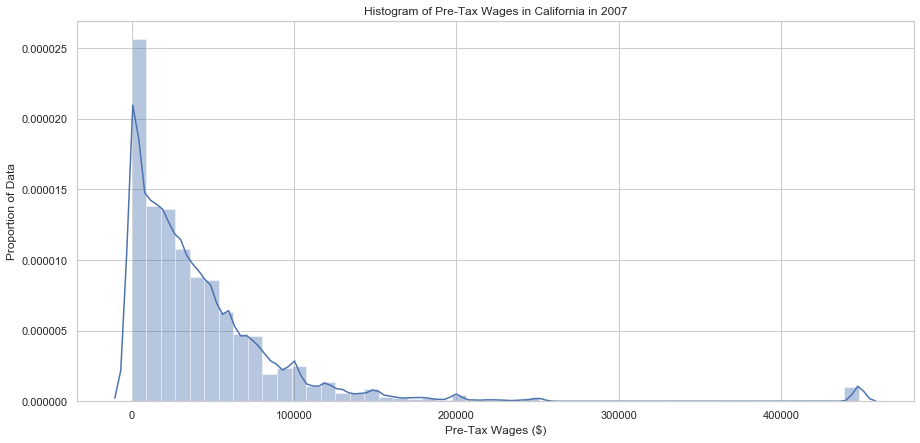

In [7]:
plt.figure(figsize = (15, 7))
sns.distplot(industry_2007['Pre-Tax Wages'], label = 'Wages in 2007')
plt.title('Histogram of Pre-Tax Wages in California in 2007')
plt.xlabel('Pre-Tax Wages ($)')
plt.ylabel('Proportion of Data');

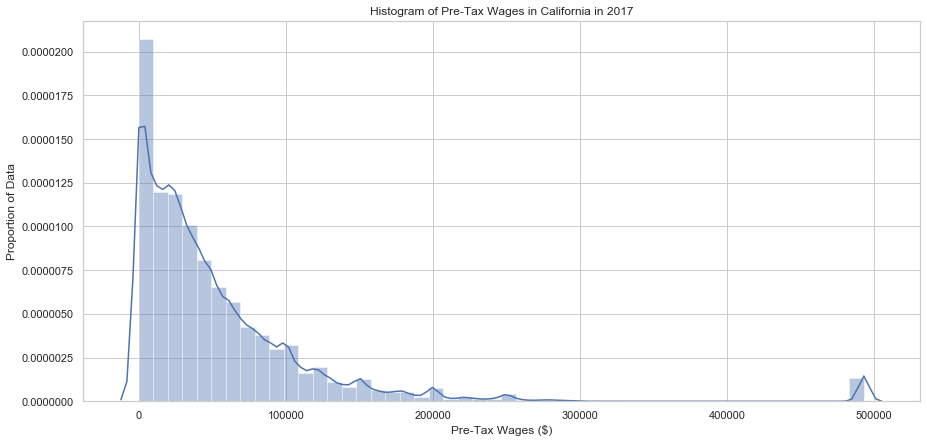

In [10]:
plt.figure(figsize = (15, 7))
sns.distplot(industry_2017['Pre-Tax Wages'], label = 'Wages in 2017')
plt.title('Histogram of Pre-Tax Wages in California in 2017')
plt.xlabel('Pre-Tax Wages ($)')
plt.ylabel('Proportion of Data');

<div class="alert alert-success">
<b> Compare these two histograms. Is there a significant difference in distribution of wages between 2007 and 2017?</b> 
</div>

##### Double click this cell and write your answer here.

One thing we may want to account for when measuring changes in dollar amounts over time is the *inflation rate*. A common way to measure this is through the Consumer Price Index, commonly denoted as the CPI. 

According to the Investopedia [2], "The CPI measures the average change in prices over time that consumers pay for a basket of goods and services, commonly known as inflation. Essentially it attempts to [...] measure the purchasing power of a country's unit of currency." 

Given that the CPI in California in 2007 was *217.424* and the CPI in California in 2017 was *262.802*, let's adjust the wages of workers in 2017 for inflation to find the *real* change in wages. 

**Run the cell below.**

<div class="alert alert-success">
<b> Use the CPI numbers above to adjust the average wage for Californian workers in 2017 for inflation. Explain how you got your answer. </b> 
</div>

##### Double click this cell and write your answer here.

*Run the cell below to check your work.*

In [11]:
cpi_2017 = 262.802
cpi_2007 = 217.424
inflation_rate = (cpi_2017 - cpi_2007)/cpi_2007 
adjust_rate = 1 + inflation_rate

print('The inflation rate from 2007 to 2017 was {}.'.format(str(np.round(inflation_rate, 4) * 100) + '%'), '\n')
print('The nominal average wage in California in 2017 was: {}'.format(dollar_formatter(average_wages_2017)), '\n')
print('The real average wage in California in 2017 was: {}'.format(dollar_formatter(average_wages_2017/adjust_rate)), '\n')
print('The real change in average wages in California between 2007 and 2017 was: {}'.format(dollar_formatter((average_wages_2017/adjust_rate) - average_wages_2007)))

The inflation rate from 2007 to 2017 was 20.87%. 

The nominal average wage in California in 2017 was: $54,084.16 

The real average wage in California in 2017 was: $44,745.45 

The real change in average wages in California between 2007 and 2017 was: $1,836.13


Great job! Now that we have gotten a taste for analyzing data and interpreting graphs, let's move on to looking at industries and occupations of workers. Note that we won't be adjusting all the dollar amounts below for inflation, so we need to keep that in mind as we do our analysis. 

### 2. Top Industries & Occupations in 2007 vs. 2017

What were the top 10 industries that survey respondents worked in between 2007 and 2017? 

**Run the cell below.**

In [17]:
round((industry_2007['Industry'].value_counts(normalize = True))[0:10] * 100, 2).to_frame().rename(columns=
                                                                                                     {'Industry': 'Percentage of Workers Employed by Industry in 2007'})

,Percentage of Workers Employed by Industry in 2007
"Transportation, Warehouse",11.83
Health Care,10.86
Retail Trade,10.75
Manufacturing,10.23
Educational Services,9.16
Company Management,7.98
Accomodation and Food Services,6.15
Other services,4.89
Finance and Insurance,4.72
Public Administration,4.50


In [18]:
round((industry_2017['Industry'].value_counts(normalize = True))[0:10] * 100, 2).to_frame().rename(columns=
                                                                                                     {'Industry': 'Percentage of Workers Employed by Industry in 2017'})

,Percentage of Workers Employed by Industry in 2017
Health Care,12.40
"Transportation, Warehouse",10.93
Retail Trade,9.99
Company Management,9.56
Educational Services,9.36
Manufacturing,9.32
Accomodation and Food Services,7.01
Other services,5.09
Public Administration,4.45
Waste Management,4.38


<div class="alert alert-success">
<b> How have the top 10 industries of workers between 2007 and 2017 changed? </b> 
</div>

##### Double click this cell and write your answer here.

The top 5 industries depicted above represent the top 5 industries in all of California. Run the cell below and select your home couny or any other county that interests you to see the top 5 industries in that county.

In [ ]:
#Joining both 2007 and 2017 tables.
industry = pd.concat([industry_2007, industry_2017])

def plot_occupations(county):
    plt.figure(figsize=(10,10));
    county_top_5 = industry[industry['County'] == county]
    p = sns.countplot(data=county_top_5,
                  x = 'Industry',
                  hue = 'Year', order=county_top_5['Occupation'].value_counts(sort=True).index[0:5], 
                     palette = sns.color_palette("twilight"))
    p.set_xticklabels(p.get_xticklabels(), rotation=45, ha='right')
    p.set_title('Top 5 Occupations in 2007 & 2017 in ' + str(county));
    p.set_xlabel('Occupations');
    
county_widget = widgets.Dropdown(
    options=list(occupation['County'].value_counts().index),
    value=list(occupation['County'].value_counts().index)[0],
    description='Select County:',
    disabled=False,
)

interact(plot_occupations, county=county_widget);

Now, let's visualize any possible changes in the top 5 occupations from 2007 to 2017.

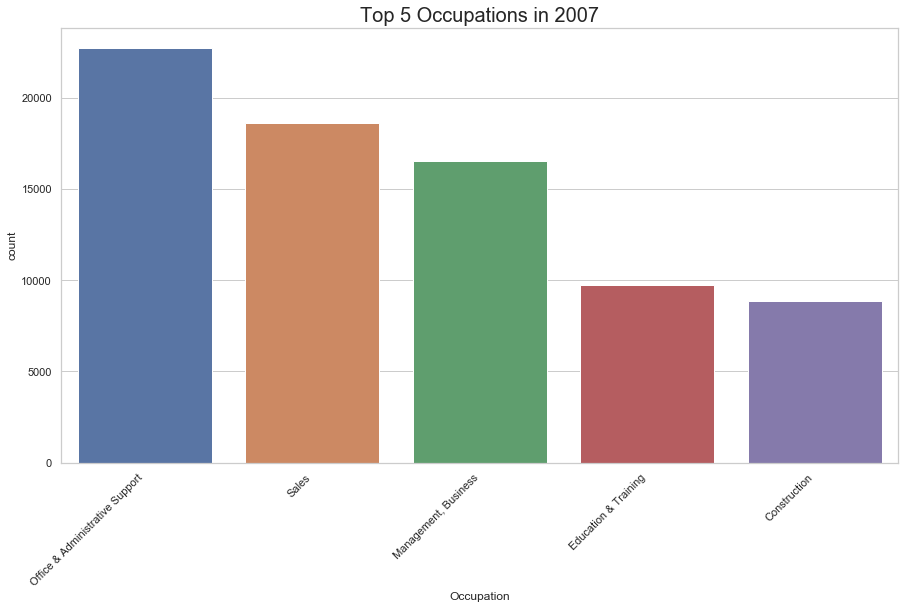

In [21]:
plt.figure(figsize=(15,8))
p = sns.countplot(data=occupation_2007,
                  x = 'Occupation',
                  order=occupation_2007['Occupation'].value_counts(sort=True).index[0:5])
p.set_xticklabels(p.get_xticklabels(), rotation=45, ha='right')
p.set_title('Top 5 Occupations in 2007', fontdict = {'fontsize': 20});
p.set_xlabel('Occupation');

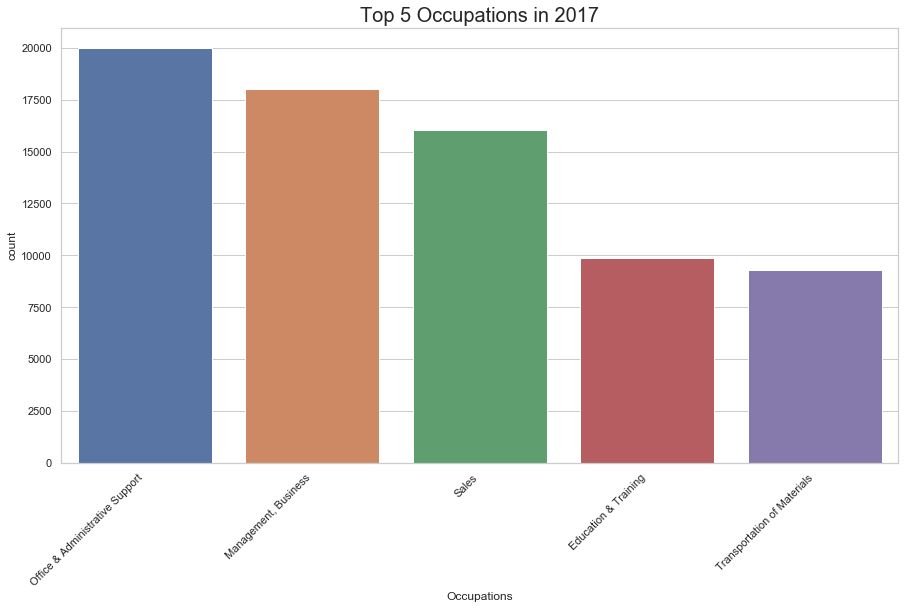

In [22]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data=occupation_2017,
                  x = 'Occupation',
                   order=occupation_2017['Occupation'].value_counts(sort=True).index[0:5])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Top 5 Occupations in 2017', fontdict = {'fontsize': 20});
ax.set_xlabel('Occupations');

Let's visualize the top 5 occupations for both years side by side.

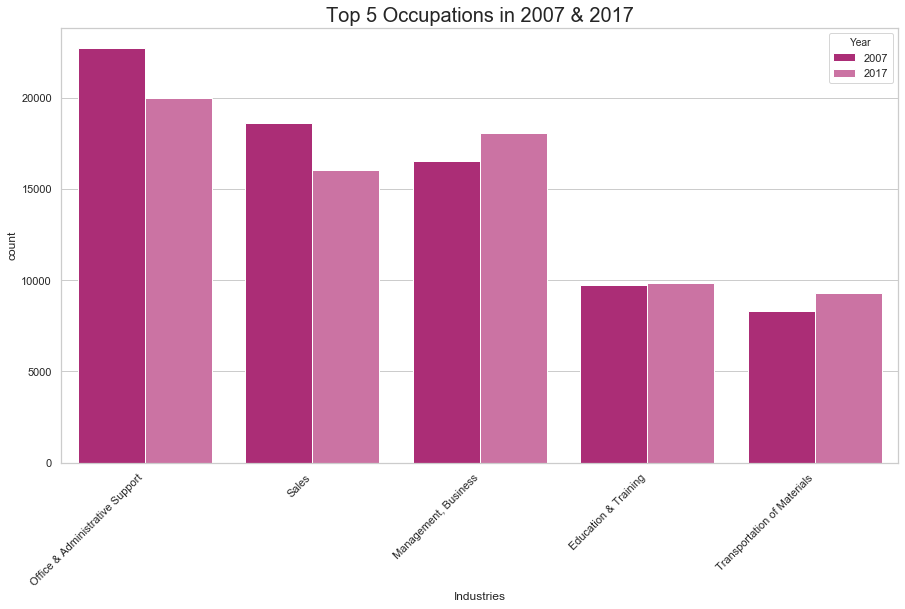

In [23]:
occupation = pd.DataFrame()
occupation = occupation.append(occupation_2007)
occupation = occupation.append(occupation_2017)
plt.figure(figsize=(15,8))
p = sns.countplot(data=occupation,
                  x = 'Occupation',
                  hue = 'Year', order=occupation['Occupation'].value_counts(sort=True).index[0:5], 
                 palette = sns.color_palette("PiYG", 10))
p.set_xticklabels(p.get_xticklabels(), rotation=45, ha="right")
p.set_title('Top 5 Occupations in 2007 & 2017', fontdict= {'fontsize' : 20});
p.set_xlabel('Industries');

<div class="alert alert-success">
<b> What changes do you see in the top 5 occupation from 2007 to 2017? If there are changes, what are the differences between 2007 and 2017? </b> 
</div>

##### Your answer here.

### Top 5 Occupations by County

Run the cell below. You should see a drop-down menu that allows youo to select one of the counties that our dataset contains. If you are an LA native, pick your county and analyze what the top 5 occupations were in 2007 and 2017. 

In [25]:
def plot_occupations(county):
    plt.figure(figsize=(10,10));
    county_top_5 = occupation[occupation['County'] == county]
    p = sns.countplot(data=county_top_5,
                  x = 'Occupation',
                  hue = 'Year', order=county_top_5['Occupation'].value_counts(sort=True).index[0:5], 
                     palette = sns.color_palette("twilight"))
    p.set_xticklabels(p.get_xticklabels(), rotation=45, ha='right')
    p.set_title('Top 5 Occupations in 2007 & 2017 in ' + str(county));
    p.set_xlabel('Occupations');
    
county_widget = widgets.Dropdown(
    options=list(occupation['County'].value_counts().index),
    value=list(occupation['County'].value_counts().index)[0],
    description='Select County:',
    disabled=False,
)

interact(plot_occupations, county=county_widget);

interactive(children=(Dropdown(description='Select County:', options=('Los Angeles-Long Beach-Anaheim, CA', 'S…

<div class="alert alert-success">
<b> What difference, if any, do you see in the top 5 occupations in both years between our entire dataset and your county/the county you selected? How does this reflect the history of the county ? </b> 
</div>

##### Your answer here.

## B) Income Distribution

For this category, we will look at distributions of income with respect to other variables. First, we will simply compare the distribution of household incomes for survey respondents. 

**Run the cells below.**

### 1. Distributions of Household Income

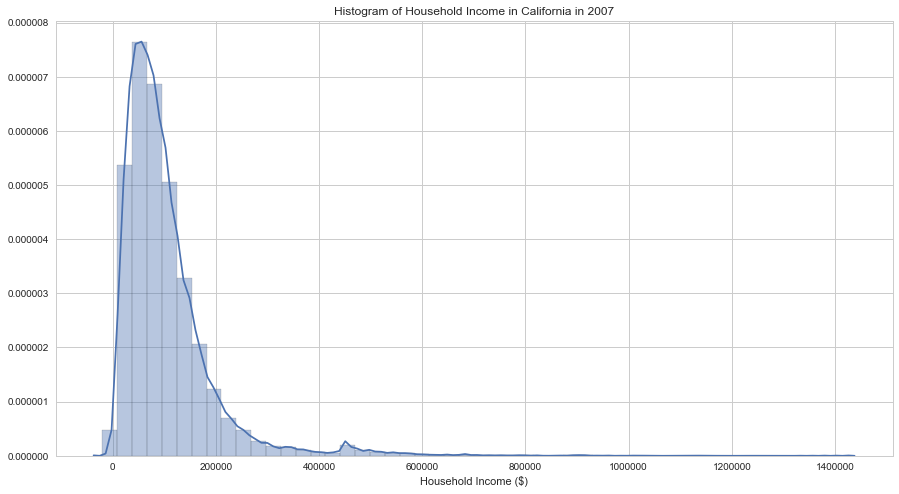

In [71]:
plt.figure(figsize=(15,8))
sns.distplot(poverty_2007['Household Income'], label = 'Income in 2007')
plt.title('Histogram of Household Income in California in 2007')
plt.xlabel('Household Income ($)');

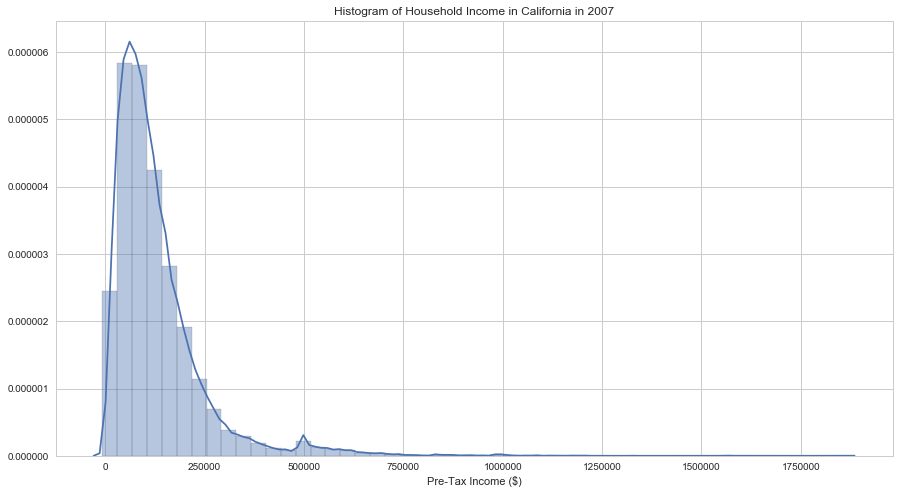

In [70]:
plt.figure(figsize=(15,8))
sns.distplot(poverty_2017['Household Income'], label = 'Income in 2017')
plt.title('Histogram of Household Income in California in 2007')
plt.xlabel('Pre-Tax Income ($)');

**3B.1.1 Task: Analyze the shapes of these histograms. How are they similar/different? Compare them with their respective histogram for wages, which we generated earlier. Are there any differences? Why might these differences arise?**

**[Double click on this cell and write your answer here]**

### 2. Statistics 

Over the past decade, the issue of income inequality has increasingly manifested, across the United States. Let's see if our dataset can provide evidence for this claim. 

Specifically, let's test if the gap between bottom and top percentile incomes have increased or decreased over a span of a decade. 

**Run the cell below. **

In [77]:
first_2007 = np.percentile(poverty_2007['Household Income'], 1)
tenth_2007 = np.percentile(poverty_2007['Household Income'], 10)
twenty_fifth_2007 = np.percentile(poverty_2007['Household Income'], 25)
seventy_fifth_2007 = np.percentile(poverty_2007['Household Income'], 75)
ninety_2007 = np.percentile(poverty_2007['Household Income'], 90)
ninety_ninth_2007 = np.percentile(poverty_2007['Household Income'], 99)
diff_1 = float(np.round(seventy_fifth_2007 - twenty_fifth_2007, 2))
diff_2 = float(np.round(ninety_2007 - tenth_2007, 2))
diff_3 = float(np.round(ninety_ninth_2007 - first_2007, 2))
print("The gap between the 75th and 25th percentile income is: {}".format(dollar_formatter(diff_1)))
print("The gap between the 10th and 90th percentile income is: {}".format(dollar_formatter(diff_2)))
print("The gap between the 1st and 99th percentile income is: {}".format(dollar_formatter(diff_3)))

The gap between the 75th and 25th percentile income is: $80,300.00
The gap between the 10th and 90th percentile income is: $163,700.00
The gap between the 1st and 99th percentile income is: $490,920.60


In [78]:
first_2017 = np.percentile(poverty_2017['Household Income'], 1)
tenth_2017 = np.percentile(poverty_2017['Household Income'], 10)
twenty_fifth_2017 = np.percentile(poverty_2017['Household Income'], 25)
seventy_fifth_2017 = np.percentile(poverty_2017['Household Income'], 75)
ninety_2017 = np.percentile(poverty_2017['Household Income'], 90)
ninety_ninth_2017 = np.percentile(poverty_2017['Household Income'], 99)
diff_1 = float(np.round(seventy_fifth_2017 - twenty_fifth_2017, 2))
diff_2 = float(np.round(ninety_2017 - tenth_2017, 2))
diff_3 = float(np.round(ninety_ninth_2017 - first_2017, 2))
print("The gap between the 75th and 25th percentile income is: {}".format(dollar_formatter(diff_1)))
print("The gap between the 10th and 90th percentile income is: {}".format(dollar_formatter(diff_2)))
print("The gap between the 1st and 99th percentile income is: {}".format(dollar_formatter(diff_3)))

The gap between the 75th and 25th percentile income is: $104,200.00
The gap between the 10th and 90th percentile income is: $217,000.00
The gap between the 1st and 99th percentile income is: $599,647.20


**Compare these statistics. Can we say that there has been a definite increase in income inequality from 2007 to 2017? Why might these numbers be misleading?**

**[Double click on this cell and write your answer here]**


### 3. Income by City

In [80]:
income_by_city = poverty_2007.groupby('City').mean()[['Household Income']].sort_values('Household Income')
income_by_city

,Household Income
City,
"East Los Angeles, CA",61080.452381
"El Monte, CA",64028.446602
"San Bernardino, CA",66487.127219
"Inglewood, CA",71588.101828
"Fresno, CA",73814.946477
"Salinas, CA",74853.972656
"Pomona, CA",77751.053381
"Ontario, CA",78378.323181
"Moreno Valley, CA",78527.778255


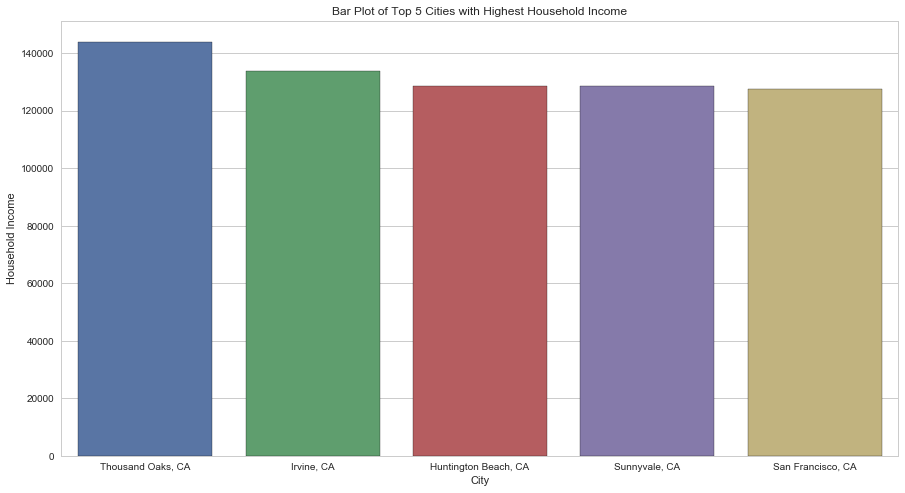

In [82]:
plt.figure(figsize = (15, 8))
top_5_income_by_city = income_by_city.sort_values('Household Income', ascending = False)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Household Income', data = top_5_income_by_city)
plt.title('Bar Plot of Top 5 Cities with Highest Household Income');

**Do some research into these cities. How may they be related and why might that explain their presence in the highest average incomes in California?**

**[Double click on this cell and write your answer here]**


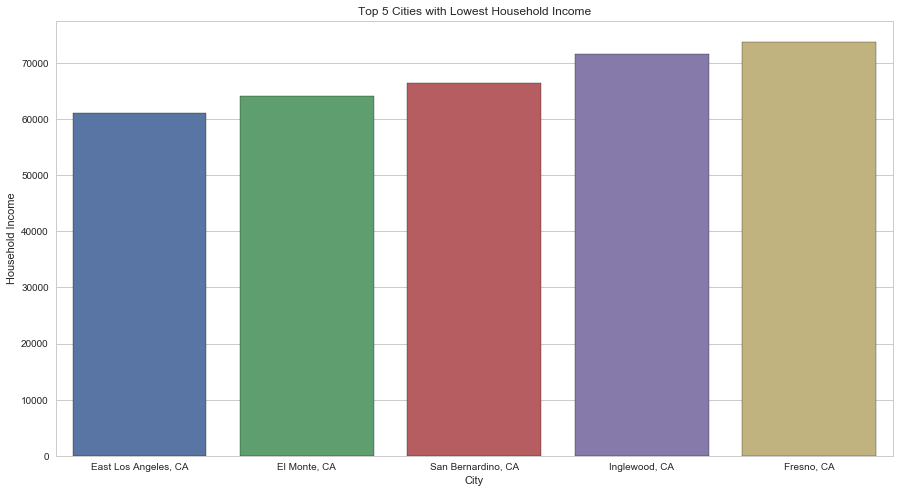

In [86]:
plt.figure(figsize = (15, 8))
bottom_5_income_by_city = income_by_city.sort_values('Household Income', ascending = True)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Household Income', data = bottom_5_income_by_city)
plt.title('Top 5 Cities with Lowest Household Income');

**Do some research into these cities. How may they be related and why might that explain their presence in the lowest average incomes in California?**

**[Double click on this cell and write your answer here]**


Finally, let's examine how the lowest and higest household income cities have changed over a span of a decade.

**Run the cells below.**

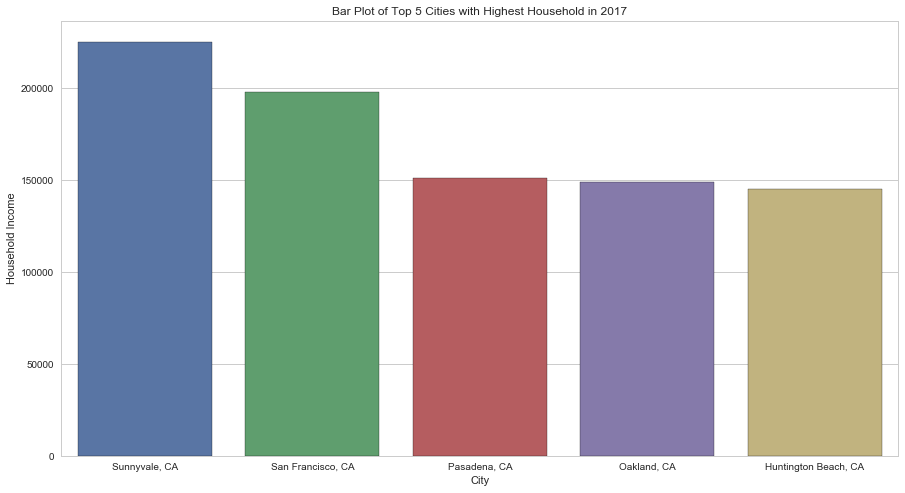

In [87]:
plt.figure(figsize = (15, 8))
income_by_city_2017 = poverty_2017.groupby('City').mean()[['Household Income']].sort_values('Household Income')
top_5_income_by_city_2017 = income_by_city_2017.sort_values('Household Income', ascending = False)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Household Income', data = top_5_income_by_city_2017)
plt.title('Bar Plot of Top 5 Cities with Highest Household in 2017');

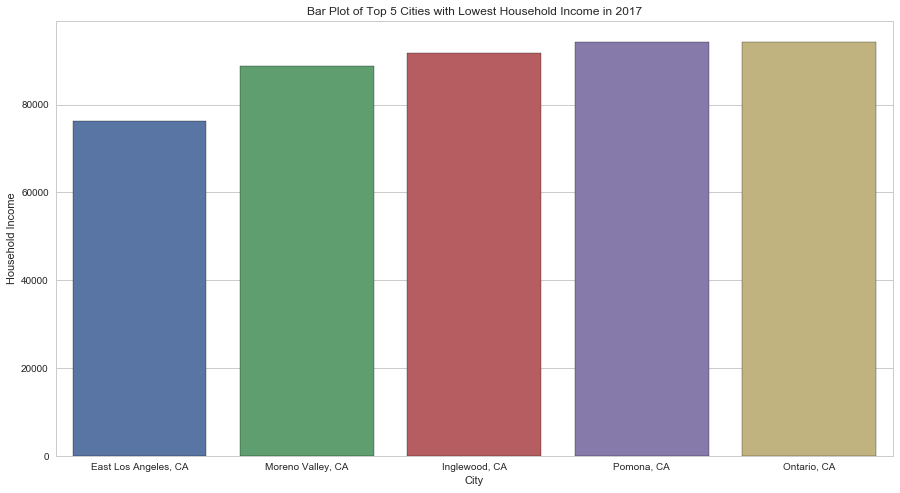

In [88]:
plt.figure(figsize = (15, 8))
income_by_city_2017 = poverty_2017.groupby('City').mean()[['Household Income']].sort_values('Household Income')
bottom_5_income_by_city_2017 = income_by_city_2017.sort_values('Household Income', ascending = True)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Household Income', data = bottom_5_income_by_city_2017)
plt.title('Bar Plot of Top 5 Cities with Lowest Household Income in 2017');

**Task: Write down any observations you have about these cities' placements, as well as how they have changed? Does income inequality have some geographical component?**

**[Double click on this cell and write your answer here]**


### 4. Wage by Type of Worker 

In [90]:
tow_inc_2007 = poverty_2007.groupby('Type of Worker').mean()[['Pre-Tax Wages']]
tow_inc_2007

,Pre-Tax Wages
Type of Worker,
Self-employed,27852.783005
Works for wages,45213.897402


In [91]:
tow_inc_2017 = poverty_2017.groupby('Type of Worker').mean()[['Pre-Tax Wages']]
tow_inc_2017

,Pre-Tax Wages
Type of Worker,
Self-employed,32185.225359
Works for wages,57111.314665


### 5. Wage by Ownership Status

In [93]:
own_inc_2007 = poverty_2007.groupby('Ownership Status').mean()[['Pre-Tax Wages']]
own_inc_2007

,Pre-Tax Wages
Ownership Status,
Owned or being bought (loan),49053.456376
Rented,31167.273307


In [94]:
own_inc_2017 = poverty_2017.groupby('Ownership Status').mean()[['Pre-Tax Wages']]
own_inc_2017

,Pre-Tax Wages
Ownership Status,
Owned or being bought (loan),62557.850940
Rented,40868.073399


In [95]:
own_inc_2007 = poverty_2007.groupby(['Ownership Status', 'City']).mean()[['Pre-Tax Wages']]
own_inc_2007

Pre-Tax Wages
Ownership Status             City                                                   
Owned or being bought (loan) Anaheim, CA                                43538.994325
                             Bakersfield, CA                            40042.944325
                             Burbank, CA                                46286.133333
                             Chula Vista, CA                            43114.343122
                             Corona, CA                                 45755.333333
                             Costa Mesa, CA                             45405.944056
                             Downey, CA                                 41898.084112
                             East Los Angeles, CA                       29080.000000
                             El Monte, CA                               27777.136364
                             Fontana, CA                                34565.965583
                             Fresno, CA                                 37819.646341
                             Fullerton, CA                              49631.335150
                             Garden Grove, CA                           35518.290993
                             Glendale, CA                               58717.628571
                             Huntington Beach, CA                       58540.157274
                             Inglewood, CA                              36924.606061
                             Irvine, CA                                 71851.577287
                             Lancaster, CA                              39688.328841
                             Long Beach, CA                             50339.132653
                             Los Angeles, CA                            51302.674930
                             Modesto, CA                                40989.442446
                             Moreno Valley, CA                          35056.378987
                             Norwalk, CA                                30606.736527
                             Not in identifiable city (or size group)   49473.964925
                             Oakland, CA                                57539.578623
                             Ontario, CA                                32365.230769
                             Orange, CA                                 58500.225873
                             Oxnard, CA                                 35410.392610
                             Palmdale, CA                               41973.188776
                             Pasadena, CA                               68539.814324
...                                                                              ...
Rented                       Irvine, CA                                 45698.461538
                             Lancaster, CA                              25892.405063
                             Long Beach, CA                             26597.540107
                             Los Angeles, CA                            27704.811731
                             Modesto, CA                                26740.219298
                             Moreno Valley, CA                          23485.722892
                             Norwalk, CA                                27295.744681
                             Not in identifiable city (or size group)   31598.391496
                             Oakland, CA                                32788.256131
                             Ontario, CA                                24638.507463
                             Orange, CA                                 28467.880435
                             Oxnard, CA                                 25345.964912
                             Palmdale, CA                               29079.300000
                             Pasadena, CA                               35990.000000
                             Pomona, CA                                 2153

In [92]:
own_inc_2017 = poverty_2017.groupby(['Ownership Status', 'City']).mean()[['Pre-Tax Wages']]
own_inc_2017

Pre-Tax Wages
Ownership Status             City                                                   
Owned or being bought (loan) Antioch, CA                                48347.410359
                             Downey, CA                                 52022.448980
                             East Los Angeles, CA                       32869.944444
                             Elk Grove, CA                              57992.376033
                             Glendale, CA                               70508.633540
                             Huntington Beach, CA                       73107.682927
                             Inglewood, CA                              45173.743842
                             Long Beach, CA                             58610.019881
                             Los Angeles, CA                            62346.852580
                             Moreno Valley, CA                          40773.196881
                             Not in identifiable city (or size group)   62227.133381
                             Oakland, CA                                81814.411492
                             Ontario, CA                                41305.264423
                             Palmdale, CA                               48906.619048
                             Pasadena, CA                               84604.409222
                             Pomona, CA                                 41196.500000
                             Rancho Cucamonga, CA                       55021.394422
                             Roseville, CA                              67208.228700
                             Salinas, CA                                40200.800000
                             San Francisco, CA                          95116.205714
                             Santa Ana, CA                              37327.275986
                             Sunnyvale, CA                             125262.603878
                             Visalia, CA                                49528.786765
Rented                       Antioch, CA                                34755.238095
                             Downey, CA                                 36030.055866
                             East Los Angeles, CA                       24141.512027
                             Elk Grove, CA                              34269.290780
                             Glendale, CA                               39553.995633
                             Huntington Beach, CA                       44711.189802
                             Inglewood, CA                              31759.670782
                             Long Beach, CA                             34443.392030
                             Los Angeles, CA                            36481.172338
                             Moreno Valley, CA                          28057.366255
                             Not in identifiable city (or size group)   40068.872338
                             Oakland, CA                                48297.099842
                             Ontario, CA                                31298.470588
                             Palmdale, CA                               32093.541667
                             Pasadena, CA                               44603.615819
                             Pomona, CA                                 23948.553719
                             Rancho Cucamonga, CA                       39929.756098
                             Roseville, CA                              42162.222222
                             Salinas, CA                                30106.327869
                             San Francisco, CA                          77166.258642
                             Santa Ana, CA                              27073.116279
                             Sunnyvale, CA                              92156.586022
                             Visalia, CA                                3195

### 6. Wage by Race

In [96]:
race_inc_2007 = poverty_2007.groupby('Race').mean()[['Pre-Tax Wages']]
race_inc_2007

,Pre-Tax Wages
Race,
African American,37240.626016
American Indian or Alaska Native,33276.249045
Asian/Pacific Islander,47089.585483
Other,26568.210156
Two or more races,34074.176808
White,46397.121813


In [97]:
race_inc_2017 = poverty_2017.groupby('Race').mean()[['Pre-Tax Wages']]
race_inc_2017

,Pre-Tax Wages
Race,
African American,44362.293938
American Indian or Alaska Native,35259.563688
Asian/Pacific Islander,62767.118305
Other,31022.265614
Two or more races,47980.467808
White,57474.720622


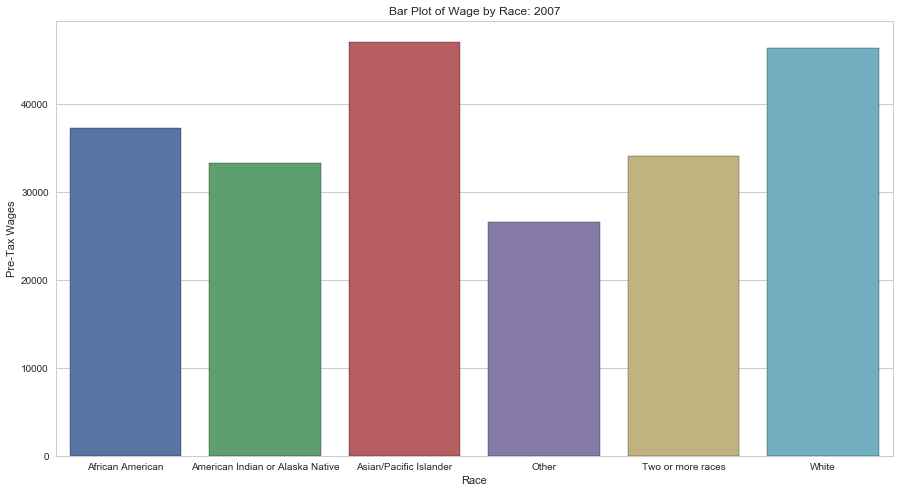

In [99]:
plt.figure(figsize = (15, 8))
race_income_2007 = race_inc_2007.reset_index()
sns.barplot(x = 'Race', y = 'Pre-Tax Wages', data = race_income_2007)
plt.title('Bar Plot of Wage by Race: 2007');

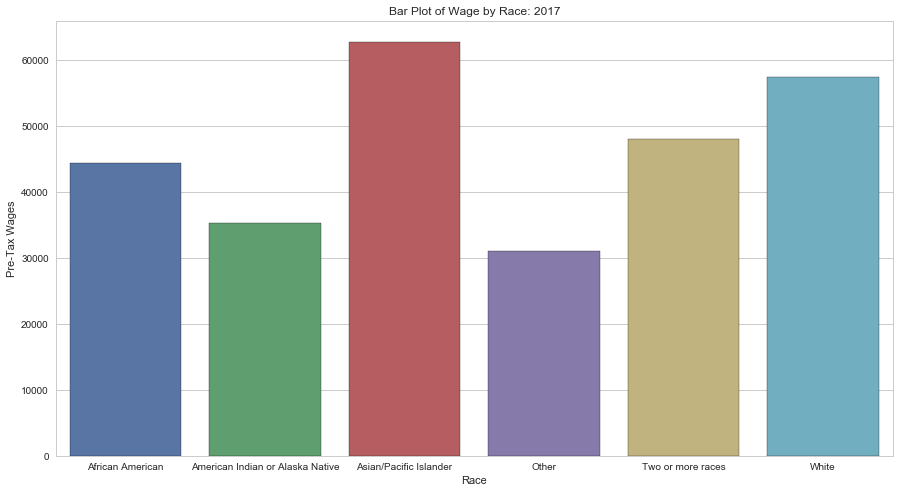

In [98]:
plt.figure(figsize = (15, 8))
race_income_2017 = race_inc_2017.reset_index()
sns.barplot(x = 'Race', y = 'Pre-Tax Wages', data = race_income_2017)
plt.title('Bar Plot of Wage by Race: 2017');

## C) Education level 

Simply run the cell below to load the education datasets.

In [ ]:
education_seven = pd.read_csv('education_2007.csv', dtype={'Hours worked per week': int})
education_seventeen = pd.read_csv('education_2017.csv', dtype={'Hours worked per week': int})
education = pd.concat([education_seven, education_seventeen])

### Education and Income
The graph below maps out the total income received based on education level. The education levels can be seen in the x-axis, while the y-axis represents the total income. 

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Education Status', y='Personal Pre-Tax Income', 
                 hue='Year', data=education, 
                palette = sns.color_palette("colorblind", 10))
ax.set_xlabel('Level of Education')
ax.set_ylabel('Total Income')
ax.set_title('Total Income for each Education Level', fontdict={'fontsize': 25});

<div class="alert alert-success">
<b> Living wage is defined as the wage that a worker needs to fulfill their basic needs. This is not to be confused with minimum wage, which is the minimum an employer can pay its employees. According to livingwage.mit.edu, the living wage in America on 2017 was about $16.07/hour. For a regular 40 hour week, that means having an income of about 35K. 

According to this dataset, what level of education ensures a livable income?  </b> 
</div>

##### Your answer here.

### Types of Workers

Our dataset also tells us whether a person was self-employed or working for wages under an employer. Let's try to to find out what the average level of education is within self-employed workers.

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(education['Type of Worker']);
plt.title('Count for Type of Workers');

This countplot visualizes the amount of workers who are employed and the amount of workers who are self-employed in our dataset. We can see that there is significantly less self-employed workers. Now let's analyze what their education level is. 

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(education[education['Type of Worker'] == 'Self-employed']['Education Status']);
plt.title('Education Status for Self-Employed Workers');

<div class="alert alert-success">
<b>What does this graph tell us about the  level of education in self-employed workers? Are you surprised by the results? How did these data disprove what you believed was the truth? If this was a result you were expecting, how do these data back up your beliefs?</b>
    </div>

##### Your answer here.

The following graphs are called violin plots. They help us visualize the distribution for a given category. Read more here "https://mode.com/blog/violin-plot-examples" if you are interested in learning more about violin plots. For now, we will use violin plots in order to help us visualize the distribution in personal income based on education level for self-employed and employed workers.

<img src="https://images.ctfassets.net/fi0zmnwlsnja/sdfgtcRp16wTNOcRceGQm/5bfcb73d2261d49ff20dd7857e0152b1/Screen_Shot_2019-03-01_at_11.36.10_AM.png" style="width:300px;height:300px;"/>

In [ ]:
plt.figure(figsize=(20, 10))
sns.violinplot(x='Education Status', y='Personal Pre-Tax Income', 
              data=education, hue='Type of Worker', palette=sns.color_palette("Paired"))
plt.title("Distribution of Self-Employed & Employed Workers' Income by Education Status", 
          fontdict={'fontsize': 15});

The long tail in our violin plots mean that there are some people whose income reached those values. For example, for those self-employed workers who completed college, we can see that the tail of our violin plot reaches above 100,000. This means that there are some self-employed workers who completed college and are at or above an income of 100K. However, since this violin plot has most of its mass within the 0-20k income range, this scenario is not very likely, as the distribution of income is mostly found within the 0-20K range. 


<div class="alert alert-success">
<b>The graph above helps us see that it does not matter so much whether one is self-employed or employed, but that education level matters much more. How can we reach this conclusion based off the graph?</b>
    </div>

##### Your answer here.

### Race

How are race and level of education related?

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(x='Education Status', hue='Race', data=education);

In [ ]:
plt.figure(figsize=(10, 15));
ax = sns.catplot(x='Education Status', col='Race', 
            data=education, kind='count', col_wrap=3, orient="h");

<div class="alert alert-success">
<b> What do these visualizations tell you about the level of education that each race receives? Our dataset clearly has more White-identifying individuals so it helps to think about each bar in our bar graph as a proportion for that race. Thus, for Asian/Pacific Islanders, there is higher proportion of people who finish college than there is high school dropouts, but for those whose race is "Other," there is a higher proportion of high school dropouts than there is college graduates. What do these graphs help tell us about our data? How can these observations help reinforce what we have found above?  </b> 
</div>

##### Your answer here.

Our dataset contains a separate column for Hispanic-identifying individuals. We can display the same visualization for those in each category in the `Hispanic` column. 

In [ ]:
plt.figure(figsize=(10, 15));
ax = sns.catplot(x='Education Status', col='Hispanic', 
            data=education, kind='count', col_wrap=3, orient="h");

<div class="alert alert-success">
<b> Are the results any different from the ones above? If so, what are the differences? </b> 
</div>

##### Your answer here.

## D) Indicators of poverty

What are the indicators of poverty? What relationship does poverty have with the other features (columns) in our dataset?

In [ ]:
poverty_seven = pd.read_csv('poverty_2007.csv')
poverty_seventeen = pd.read_csv('poverty_2017.csv')
poverty = pd.concat([poverty_seven, poverty_seventeen])

### Employment Status

For poverty, our data categorizes an individual into one of three categories: `Near Poverty`, `Non-Poverty`, and `Poverty`. We will be looking at those who are in `Poverty` or `Near Poverty`.

In [ ]:
plt.figure(figsize=(15, 5))
all_poverty = poverty[(poverty['Poverty Status'] == 'Poverty') | (poverty['Poverty Status'] == 'Near Poverty')]
sns.countplot(x='Employment Status', data=all_poverty, hue='Poverty Status')
plt.title('Amount of Individuals At or Near Poverty by Employment Status');

### Cities and Occupations in High-Poverty Areas

What are top 5 cities with the highest amount of poverty? Run the cell below, it should output the cities with most citizens at or near poverty.

In [ ]:
j = 1
for i in all_poverty['City'].value_counts(sort=True).index[0:5]:
    print(str(j)  + " city: " + str(i))
    j+=1

The top "city" regarding poverty in our dataset is not actually a city, so lets try that again. This time, we will ignore "Not in indetifiable city".

In [ ]:
j = 1
for i in all_poverty['City'].value_counts(sort=True).index[1:6]:
    print(str(j)  + " city: " + str(i))
    j+=1

<div class="alert alert-success">
<b> What are the top 5 cities that contain the most poverty? Why do you think that is? </b> 
</div>

##### Your answer here.

What are the top 5 occupations for people in poverty? Run the cell below, it should output the top 5 industries for those at OR near poverty.

In [ ]:
j = 1
for i in occupation[(occupation['Poverty Status'] == 'Poverty') | 
                    (occupation['Poverty Status'] == 'Near Poverty')]['Occupation'].value_counts(
    sort=True).index[0:5]:
    print(j, 'Top Occupation:', i)
    j +=1

<div class="alert alert-success">
<b> What are the top 5 occupations for members in poverty? </b> 
</div>

##### Your answer here.

The graph below maps out the average hours worked per week for each occupation. Look for the 5 occupations we found above.

In [ ]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='Occupation', y='Hours worked per week', data=poverty)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
plt.title('Hours Worked per Week by Occupation');

<div class="alert alert-success">
<b> What do you notice in terms of hours worked per week for the top 5 industries for those in poverty? Are thse findings surprising? How does the graph above help explain why certain members in certain occupations are in poverty? How can these data help us see what possible indicators of poverty may be? </b> 
</div>

##### Your answer here.

## E) Employment

### 1. Total Employment Statistics by Year

In [101]:
employment_07 = emp_sector_2007.groupby('Employment Status').mean()[['Pre-Tax Wages']]
employment_07

,Pre-Tax Wages
Employment Status,
Employed,46313.573078
Not in labor force,17704.986072
Unemployed,18373.795334


In [102]:
employment_17 = emp_sector_2017.groupby('Employment Status').mean()[['Pre-Tax Wages']]
employment_17

,Pre-Tax Wages
Employment Status,
Employed,57157.621113
Not in labor force,16461.246908
Unemployed,21291.770419


In [106]:
change_in_wages_employed = employment_17['Pre-Tax Wages'][0] - employment_07['Pre-Tax Wages'][0]
print(dollar_formatter(float(change_in_wages_employed)))

$10,844.05


### 2. Work Status and Foodstamp Recipient

In [108]:
employment_07 =emp_sector_2007.groupby(['Employment Status', 'Foodstamp Recipient']).count()[['Pre-Tax Wages']].rename(columns = {'Pre-Tax Wages':'Count'})
employment_17 = emp_sector_2017.groupby(['Employment Status', 'Foodstamp Recipient']).count()[['Pre-Tax Wages']].rename(columns = {'Pre-Tax Wages':'Count'})
display(employment_07, employment_17)

Count
Employment Status  Foodstamp Recipient        
Employed           No                   136996
                   Yes                    4004
Not in labor force No                    11927
                   Yes                     638
Unemployed         No                     5777
                   Yes                     653

Count
Employment Status  Foodstamp Recipient        
Employed           No                   135841
                   Yes                   11216
Not in labor force No                     7479
                   Yes                     929
Unemployed         No                     3681
                   Yes                     849

### 3. Employment Sector vs. Personal Income

In [109]:
employment_income07 =emp_sector_2007.groupby('Employment Status').mean()[['Pre-Tax Wages']]
employment_income17 = emp_sector_2017.groupby('Employment Status').mean()[['Pre-Tax Wages']]
display(employment_income07, employment_income17)

,Pre-Tax Wages
Employment Status,
Employed,46313.573078
Not in labor force,17704.986072
Unemployed,18373.795334


,Pre-Tax Wages
Employment Status,
Employed,57157.621113
Not in labor force,16461.246908
Unemployed,21291.770419


## Bibliography <a id = 'section7'></a>

• https://www.census.gov/programs-surveys/saipe/guidance/model-input-data/cpsasec.html

• https://www.investopedia.com/terms/c/consumerpriceindex.asp

• https://en.wikipedia.org/wiki/Stratified_sampling

• (TBD)

___
### Sidenotes:
[1]: Since the size of the original dataset was too large, we are using Stratified Random Samples instead. Refer to the link in the bibliography for more information on our sampling approach. 

___
### Getting extra help

Interested in getting help with learning Python or applying computational analysis? Check out  [Data Peer Consulting](https://data.berkeley.edu/education/data-peer-consulting) in Moffitt library for drop-in, one-on-one questions. For additional workshops designed for people new to computational analysis, take a look at the workshops at [The Dlab](https://dlab.berkeley.edu) (free for Berkeley students!). 

Best  luck!

------------------------------------------------------------------------------------------------------------------------

### Feedback:
Please let us know your thoughts on this notebook!

Fill out the survey at this link: https://docs.google.com/forms/d/e/1FAIpQLSfahkYSKqlEEfC6WMKlaqeIxRVj0r7T4N5lgBf9bRVwRG58wQ/viewform

------------------------------------------------------------------------------------------------------------------------
Notebook developed by: Ritvik Iyer, Carlos Calderon

Data Science Modules: http://data.berkeley.edu/education/modules